# cygnus-config
Different Cygnus configs
- `triage`: 200M warmup + 50M sim + SHiP + Triage paper config
- `cygnus`: 50M warmup + 50M sim + SHiP + 1200 MT/s
- `cygnus_mockingjay`: 50M warmup + 50M sim + Mockingjay
- `cygnus_drrip`: 50M warmup + 50M sim + DRRIP
- `pythia`: 50M warmup + 50M sim + SHiP + Pythia paper config

In [1]:
from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

# Configuration

In [2]:
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    #'L2C_pf_issued',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    # {'PC'}, 
]

baselines = ['bo', 'spp_dev2', 'spp_ppf_dev', 'bingo']
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Pythia-Width': colormaps['Greys'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'Cygnus-Width': colormaps['Oranges'],
}

In [3]:
base_dirs = {
    'pythia': '/u/cmolder/GitHub/ChampSim/out/pythia/',
    'cygnus': '/u/cmolder/GitHub/ChampSim/out/cygnus/'
}

dfs = {
    # ===
    # ===== Triage =====
    # ===
    'triage/degree1/baseline': tables.load_stats_csv(
        base_dirs['pythia'], 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    'triage/degree1/pythia': tables.load_stats_csv_pythia(
        base_dirs['pythia'], 'degree1/pythia/bwaware3.csv',
        feature_sets=features),

    'triage/degree1/cygnus_ignore': tables.load_stats_csv_pythia(
        base_dirs['pythia'], 'degree1/bythio/bwaware3_ignorequeued.csv',
        feature_sets=features, feature_key='bythio_features'),

    'triage/degreedyn/baseline': tables.load_stats_csv(
        base_dirs['pythia'], 'degreedyn/baseline.csv', 
        ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),

    'triage/degreedyn/pythia': tables.load_stats_csv_pythia(
        base_dirs['pythia'], 'degreedyn/pythia/bwaware3.csv',
        feature_sets=features),

    'triage/degreedyn/cygnus_ignore': tables.load_stats_csv_pythia(
        base_dirs['pythia'], 'degreedyn/bythio/bwaware3_ignorequeued.csv',
        feature_sets=features, feature_key='bythio_features'),

    'triage/degreedyn/cygnus_width': tables.load_stats_csv_pythia(
        base_dirs['pythia'], 'degreedyn/bythio/bwaware3_width_moreactions.csv',
        feature_sets=features, feature_key='bythio_features'),

    # ===
    # ===== Cygnus SHiP =====
    # ===
    'cygnus/degree1/baseline': tables.load_stats_csv(
        base_dirs['cygnus'], 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    'cygnus/degree1/pythia': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'degree1/pythia/bwaware3.csv',
        feature_sets=features),

    'cygnus/degree1/cygnus_ignore': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'degree1/cygnus/bwaware3_ignorequeued.csv',
        feature_sets=features, feature_key='cygnus_features'),

    'cygnus/degreedyn/baseline': tables.load_stats_csv(
        base_dirs['cygnus'], 'degreedyn/baseline.csv',
        ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),

    'cygnus/degreedyn/pythia': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'degreedyn/pythia/bwaware3.csv',
        feature_sets=features),

    'cygnus/degreedyn/cygnus_ignore': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'degreedyn/cygnus/bwaware3_ignorequeued.csv',
        feature_sets=features, feature_key='cygnus_features'),
    
    # 'cygnus/degreedyn/cygnus_width': tables.load_stats_csv_pythia(
    #     base_dirs['cygnus'], 'degreedyn/cygnus/bwaware3_width_moreactions.csv',
    #     feature_sets=features, feature_key='cygnus_features'),

    # ===
    # ===== Pythia
    # ===
    'pythia/degree1/baseline': tables.load_stats_csv(
        base_dirs['cygnus'], 'config_pythia_degree1/baseline.csv', baselines, prefetchers_level='l2'),
    
    'pythia/degree1/pythia': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'config_pythia_degree1/pythia/bwaware3.csv',
        feature_sets=features),

    'pythia/degree1/cygnus_ignore': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'config_pythia_degree1/cygnus/bwaware3_ignorequeued.csv',
        feature_sets=features, feature_key='cygnus_features'),

    'pythia/degreedyn/baseline': tables.load_stats_csv(
        base_dirs['cygnus'], 'config_pythia_degreedyn/baseline.csv',
        ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),

    'pythia/degreedyn/pythia': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'config_pythia_degreedyn/pythia/bwaware3.csv',
        feature_sets=features),
    
    'pythia/degreedyn/cygnus_ignore': tables.load_stats_csv_pythia(
        base_dirs['cygnus'], 'config_pythia_degreedyn/cygnus/bwaware3_ignorequeued.csv',
        feature_sets=features, feature_key='cygnus_features'),

    # 'pythia/degreedyn/cygnus_width': tables.load_stats_csv_pythia(
    #     base_dirs['cygnus'], 'config_pythia_degreedyn/cygnus/bwaware3_width_moreactions.csv',
    #     feature_sets=features, feature_key='cygnus_features'),

    # ===
    # ===== Cygnus Mockingjay =====
    # ===
    # 'cygnus_mockingjay/degree1/baseline': tables.load_stats_csv(
    #     base_dirs['cygnus'], 'llcrepl_mockingjay_degreedyn/baseline.csv', 
    #     baselines, prefetchers_level='l2'),

    # 'cygnus_mockingjay/degreedyn/baseline': tables.load_stats_csv(
    #     base_dirs['cygnus'], 'llcrepl_mockingjay_degreedyn/baseline.csv',
    #     ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),

    # ===
    # ===== Cygnus DRRIP =====
    # ===
    # 'cygnus_drrip/degree1/baseline': tables.load_stats_csv(
    #     base_dirs['cygnus'], 'llcrepl_drrip_degree1/baseline.csv', 
    #     baselines, prefetchers_level='l2'),
    
    # 'cygnus_drrip/degreedyn/baseline': tables.load_stats_csv(
    #     base_dirs['cygnus'], 'llcrepl_drrip_degreedyn/baseline.csv',
    #     ['spp_dev2', 'spp_ppf_dev', 'bingo'], prefetchers_level='l2'),
}

colors = defaultdict(lambda: None, {
    'Pythia': cmaps['Pythia'](0.65),
    'Pythia +Ignore': cmaps['Pythia-Ignore'](0.65),

    'Cygnus': cmaps['Cygnus'](0.65),
    'Cygnus +Ignore': cmaps['Cygnus-Ignore'](0.65),
    
    'Cygnus-Width': cmaps['Cygnus-Width'](0.65),

    'Bingo': 'purple',
    'BO': 'goldenrod',
    'SPP': 'royalblue',
    'SPP+PPF': 'darkturquoise',
})

hatches = defaultdict(lambda: None, {
    'Pythia': '\\\\',
    'Pythia +Ignore': '\\\\',
    
    'Cygnus': '//',
    'Cygnus +Ignore': '//',
    'Cygnus-Width': '//',
    
    'Bingo': '.',
    'BO': 'o',
    'SPP': 'x',
    'SPP+PPF': 'x',
})

label_kwargs = {
    'rotation': 45,
    'ha': 'right',
}

# Plots

## Degree 1

### Triage

In [7]:
triage_degree1_df = {
    'Pythia': dfs['triage/degree1/pythia']['Delta_Path, PC_Delta'],
    'Cygnus +Ignore': dfs['triage/degree1/cygnus_ignore']['Delta_Path, PC_Delta'],

    'Bingo': dfs['triage/degree1/baseline']['bingo'],
    'BO': dfs['triage/degree1/baseline']['bo'],
    'SPP': dfs['triage/degree1/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['triage/degree1/baseline']['spp_ppf_dev'],
}

triage_degree1_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

triage_degree1_suptitle = 'Triage SHiP degree 1\n'

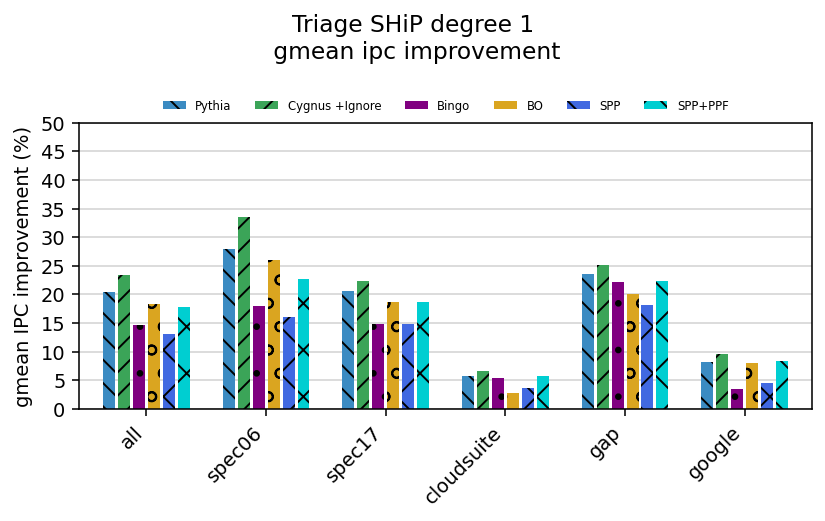

In [8]:
plots.plot_metric_means(triage_degree1_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=triage_degree1_legend_kwargs,
                        suptitle=triage_degree1_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


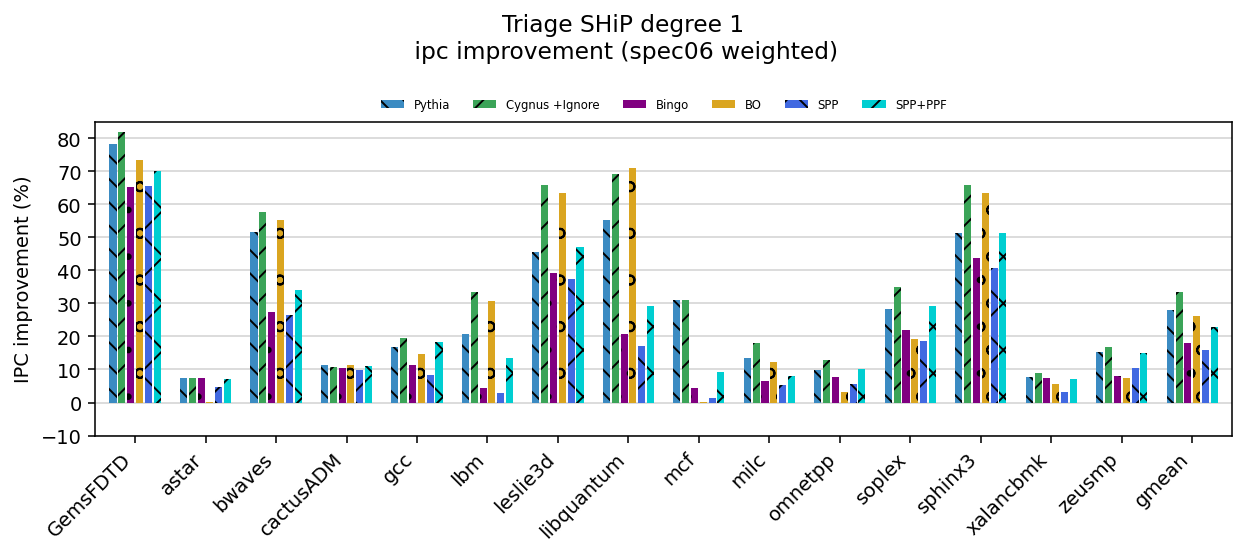

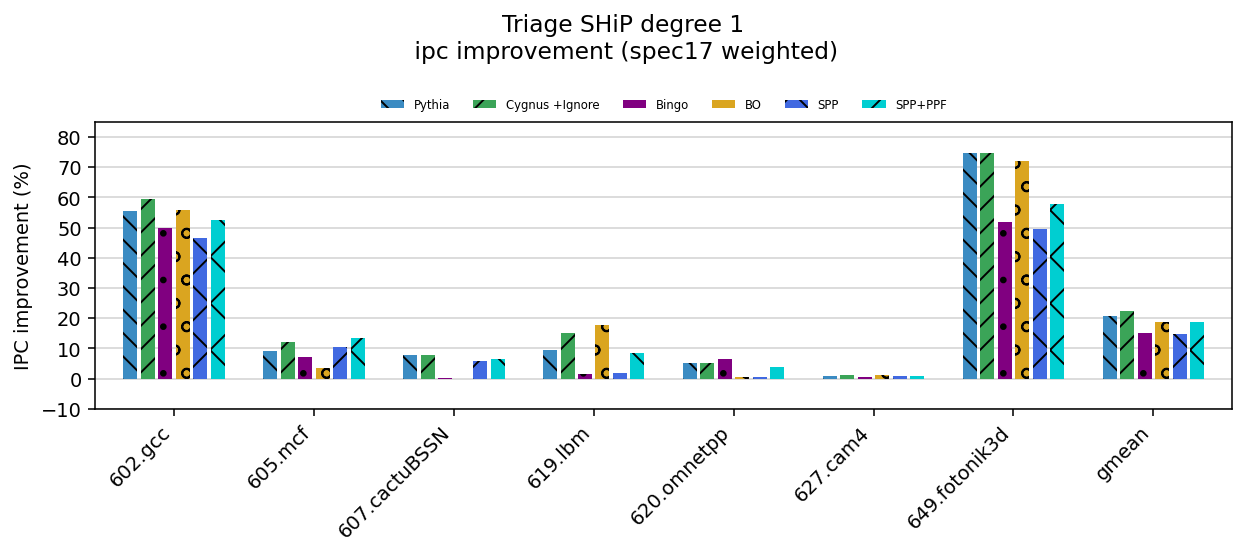

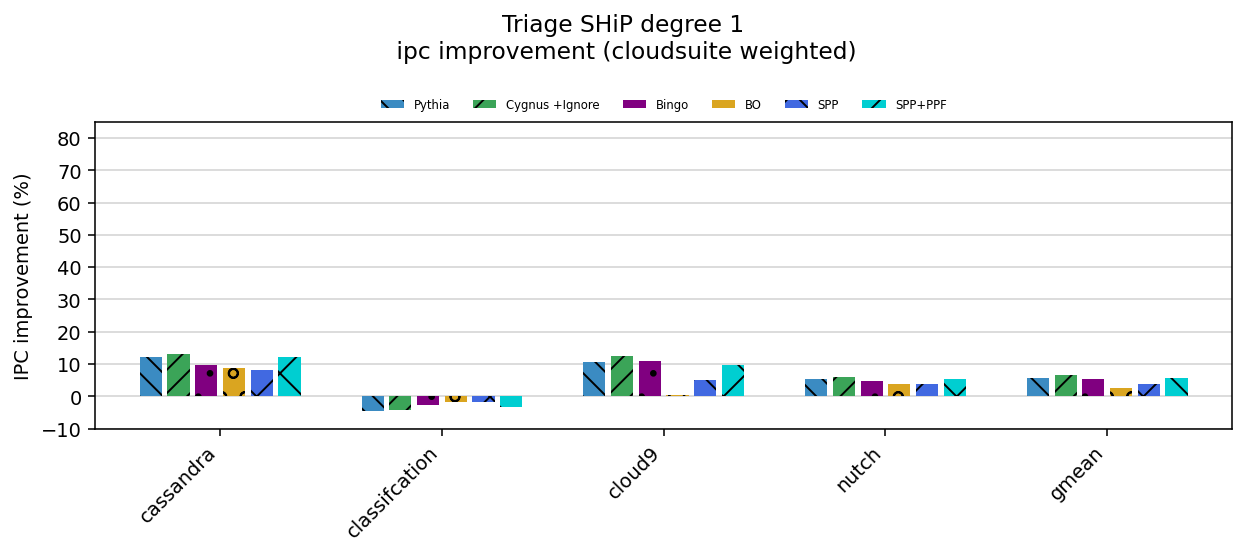

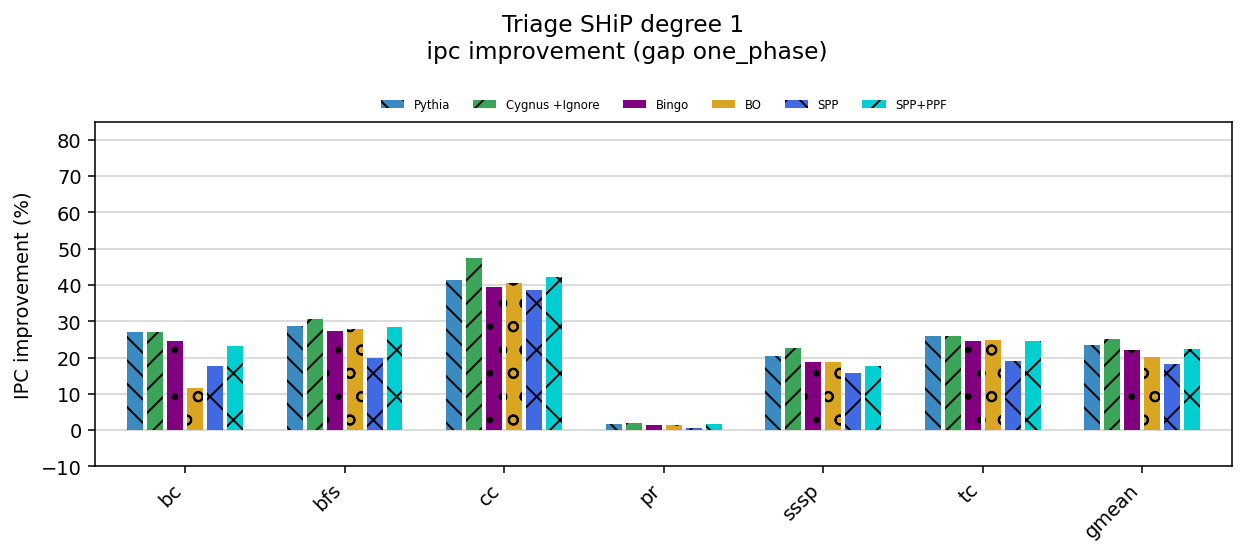

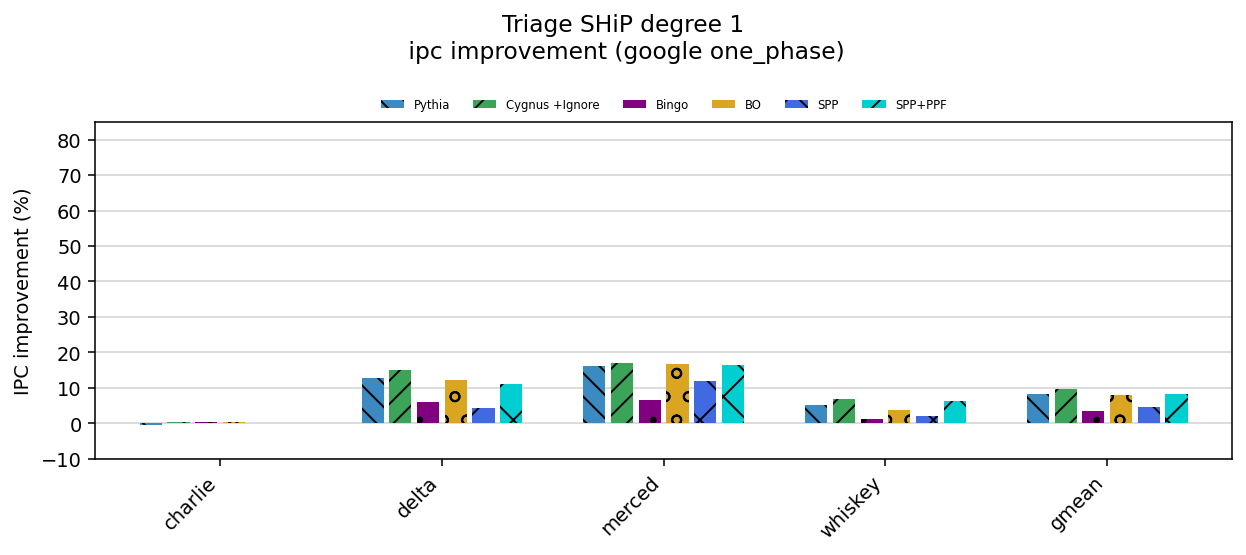

In [6]:
plots.plot_everything(triage_degree1_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=triage_degree1_legend_kwargs,
                      suptitle=triage_degree1_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-10, 85),
                      dpi=140, figsize=(9, 4))

### Pythia SHiP

In [28]:
pythia_ship_degree1_df = {
    'Pythia': dfs['pythia/degree1/pythia']['Delta_Path, PC_Delta'],
    'Cygnus +Ignore': dfs['pythia/degree1/cygnus_ignore']['Delta_Path, PC_Delta'],
    
    'Bingo': dfs['pythia/degree1/baseline']['bingo'],
    'BO': dfs['pythia/degree1/baseline']['bo'],
    'SPP': dfs['pythia/degree1/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['pythia/degree1/baseline']['spp_ppf_dev'],
}

pythia_ship_degree1_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

pythia_ship_degree1_suptitle = 'Pythia SHiP degree 1\n'

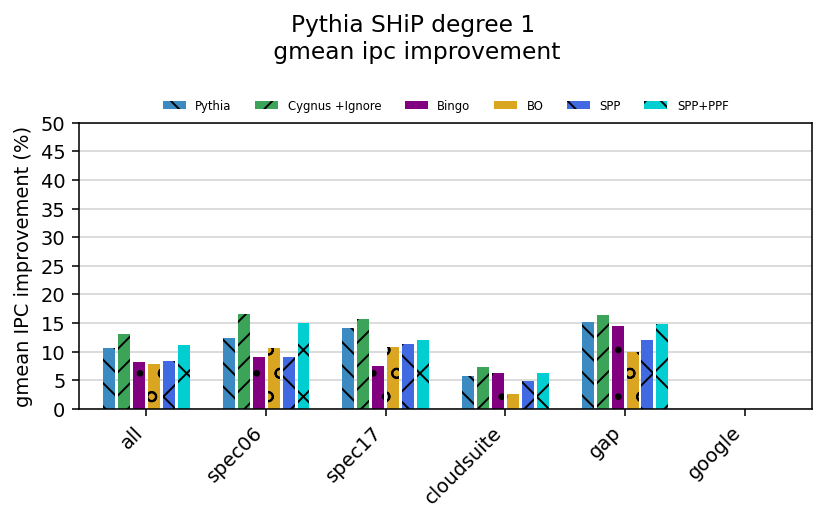

In [29]:
plots.plot_metric_means(pythia_ship_degree1_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=pythia_ship_degree1_legend_kwargs,
                        suptitle=pythia_ship_degree1_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


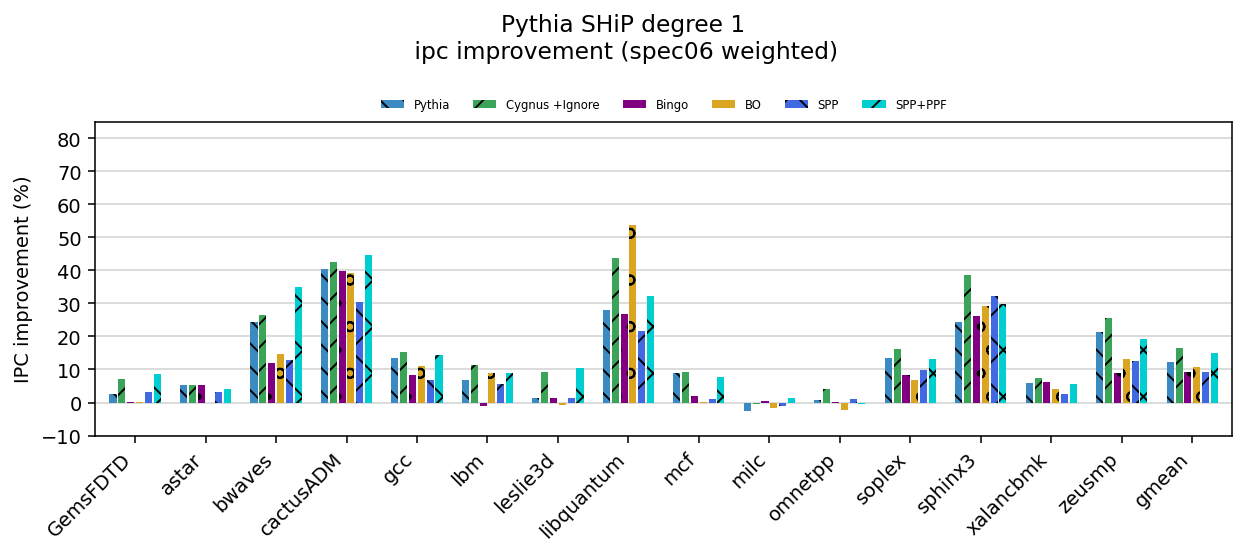

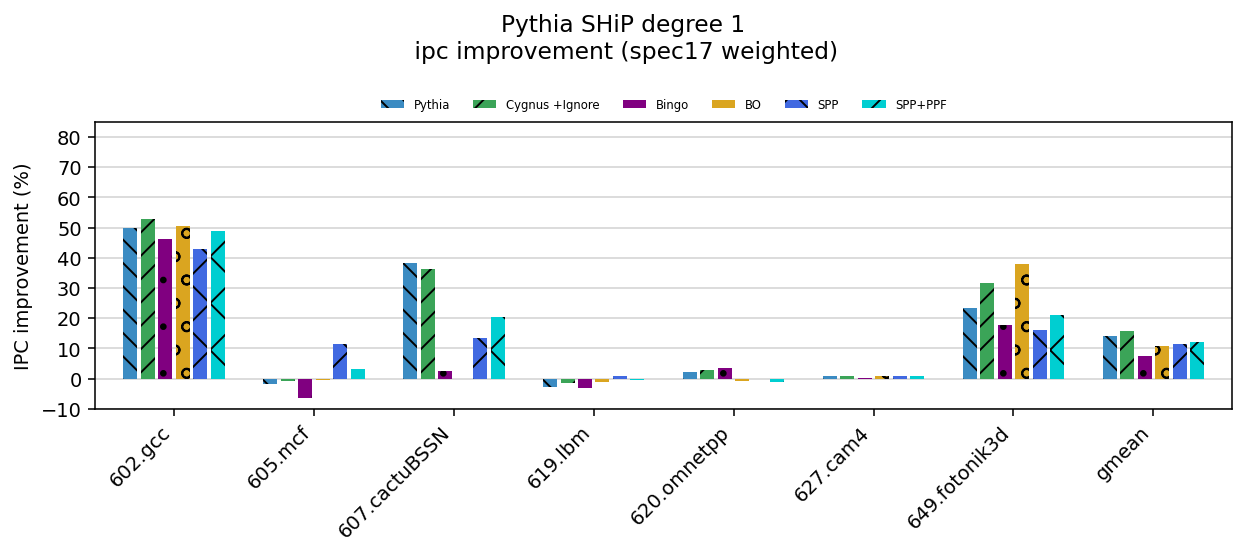

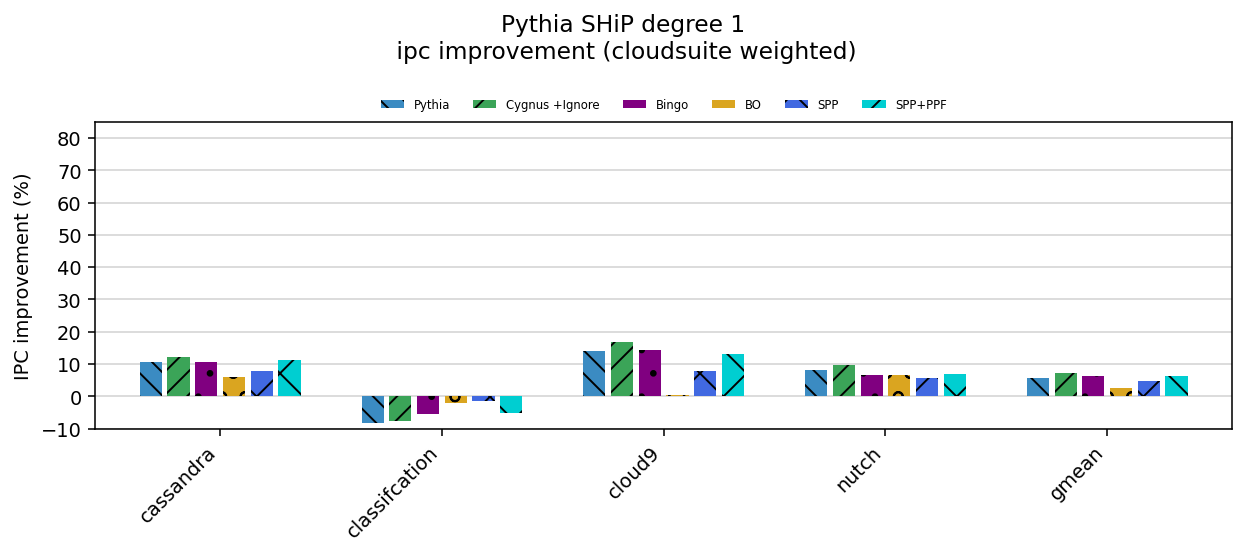

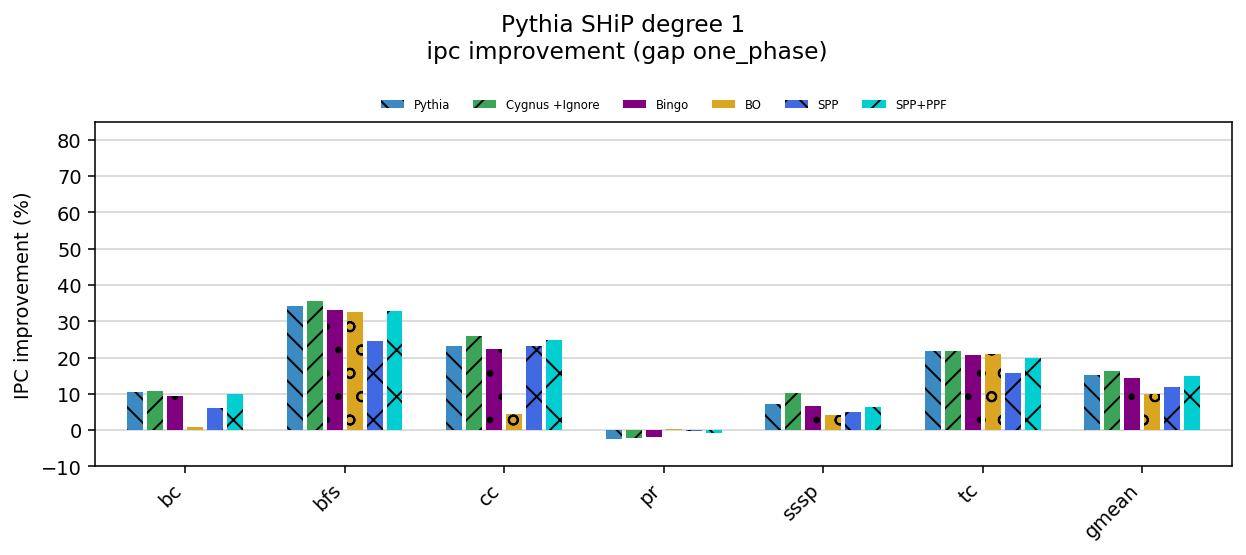

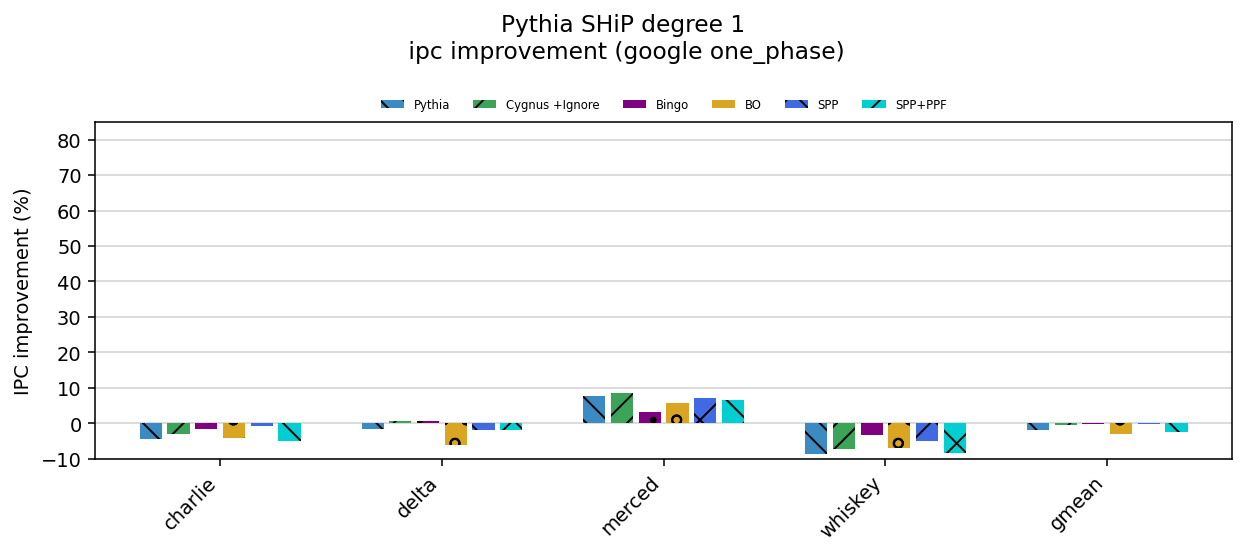

In [30]:
plots.plot_everything(pythia_ship_degree1_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=pythia_ship_degree1_legend_kwargs,
                      suptitle=pythia_ship_degree1_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-10, 85),
                      dpi=140, figsize=(9, 4))

### Cygnus SHiP

In [4]:
cygnus_ship_degree1_df = {
    'Pythia': dfs['cygnus/degree1/pythia']['Delta_Path, PC_Delta'],
    'Cygnus +Ignore': dfs['cygnus/degree1/cygnus_ignore']['Delta_Path, PC_Delta'],
    
    'Bingo': dfs['cygnus/degree1/baseline']['bingo'],
    'BO': dfs['cygnus/degree1/baseline']['bo'],
    'SPP': dfs['cygnus/degree1/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['cygnus/degree1/baseline']['spp_ppf_dev'],
}

cygnus_ship_degree1_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

cygnus_ship_degree1_suptitle = 'Cygnus SHiP degree 1\n'

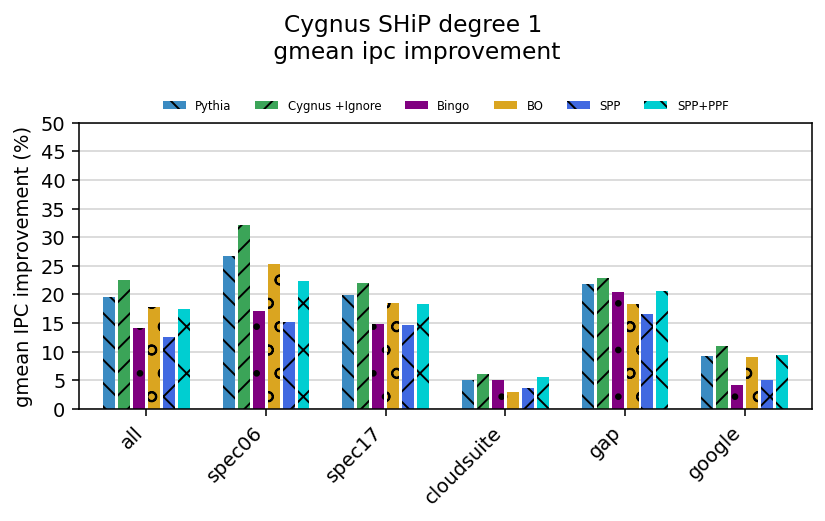

In [5]:
plots.plot_metric_means(cygnus_ship_degree1_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=cygnus_ship_degree1_legend_kwargs,
                        suptitle=cygnus_ship_degree1_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


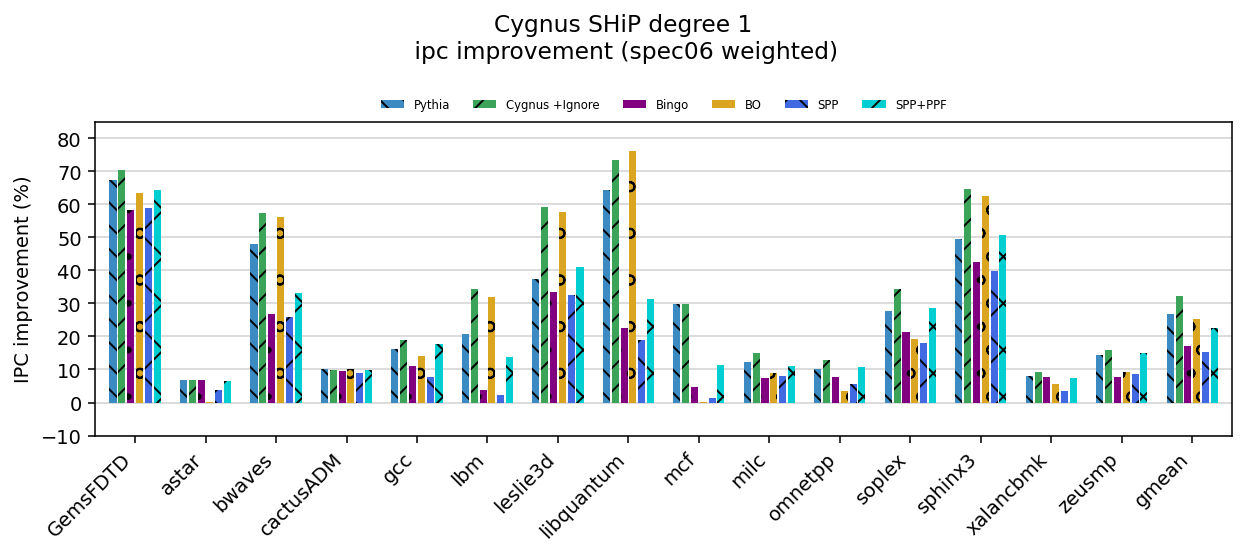

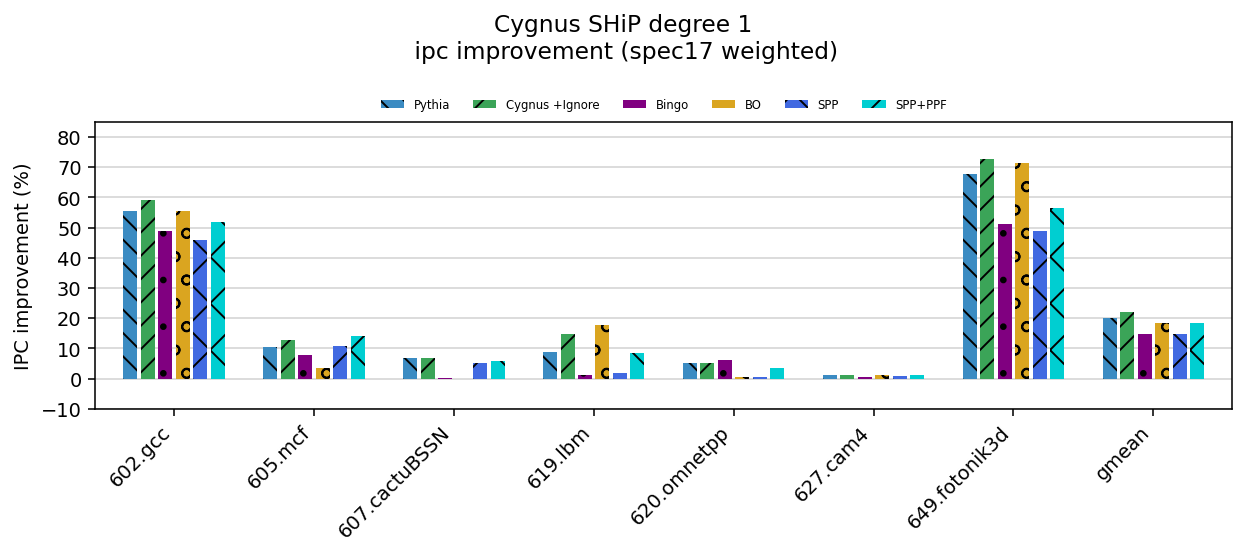

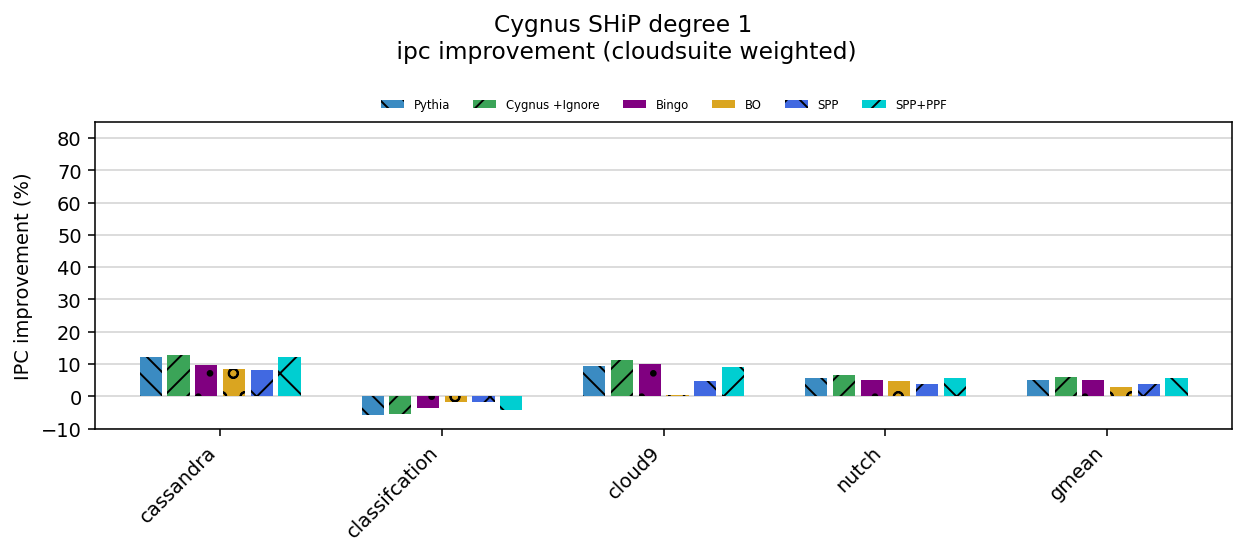

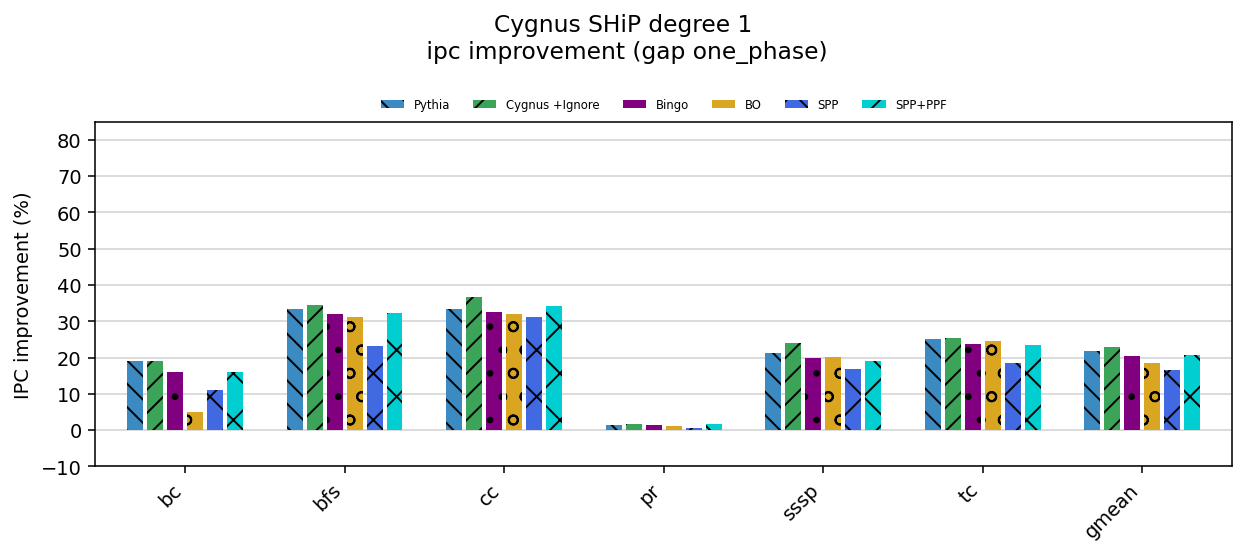

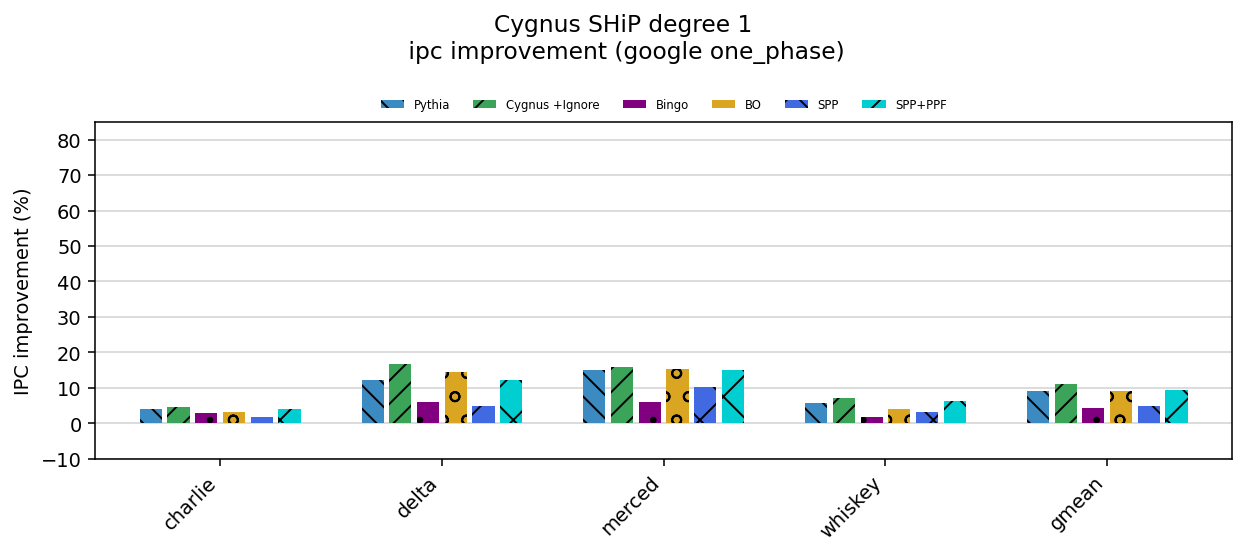

In [6]:
plots.plot_everything(cygnus_ship_degree1_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=cygnus_ship_degree1_legend_kwargs,
                      suptitle=cygnus_ship_degree1_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-10, 85),
                      dpi=140, figsize=(9, 4))

### Cygnus Mockingjay

In [10]:
cygnus_mockingjay_degree1_df = {
    'Bingo': dfs['cygnus_mockingjay/degree1/baseline']['bingo'],
    'BO': dfs['cygnus_mockingjay/degree1/baseline']['bo'],
    'SPP': dfs['cygnus_mockingjay/degree1/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['cygnus_mockingjay/degree1/baseline']['spp_ppf_dev'],
}

cygnus_mockingjay_degree1_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

cygnus_mockingjay_degree1_suptitle = 'Cygnus Mockingjay\n'

KeyError: 'cygnus_mockingjay/degree1/baseline'

In [ ]:
plots.plot_metric_means(cygnus_mockingjay_degree1_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=cygnus_mockingjay_degree1_legend_kwargs,
                        suptitle=cygnus_mockingjay_degree1_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

In [ ]:
plots.plot_everything(cygnus_mockingjay_degree1_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=cygnus_mockingjay_degree1_legend_kwargs,
                      suptitle=cygnus_mockingjay_degree1_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-10, 125),
                      dpi=140, figsize=(9, 4))

### Cygnus DRRIP

In [ ]:
cygnus_drrip_degree1_df = {
    'Bingo': dfs['cygnus_drrip/degree1/baseline']['bingo'],
    'BO': dfs['cygnus_drrip/degree1/baseline']['bo'],
    'SPP': dfs['cygnus_drrip/degree1/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['cygnus_drrip/degree1/baseline']['spp_ppf_dev'],
}

cygnus_drrip_degree1_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

cygnus_drrip_degree1_suptitle = 'Cygnus DRRIP\n'

In [ ]:
plots.plot_metric_means(cygnus_drrip_degree1_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=cygnus_drrip_degree1_legend_kwargs,
                        suptitle=cygnus_drrip_degree1_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

In [ ]:
plots.plot_metric_means(cygnus_drrip_degree1_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=cygnus_drrip_degree1_legend_kwargs,
                        suptitle=cygnus_drrip_degree1_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

## Dynamic degree

### Triage

In [11]:
triage_degreedyn_df = {
    'Pythia': dfs['triage/degreedyn/pythia']['Delta_Path, PC_Delta'],
    'Cygnus +Ignore': dfs['triage/degreedyn/cygnus_ignore']['Delta_Path, PC_Delta'],
    'Cygnus-Width': dfs['triage/degreedyn/cygnus_width']['Delta_Path, PC_Delta'],

    'Bingo': dfs['triage/degreedyn/baseline']['bingo'],
    'SPP': dfs['triage/degreedyn/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['triage/degreedyn/baseline']['spp_ppf_dev'],
}

triage_degreedyn_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

triage_degreedyn_suptitle = 'Triage SHiP dynamic degree\n'

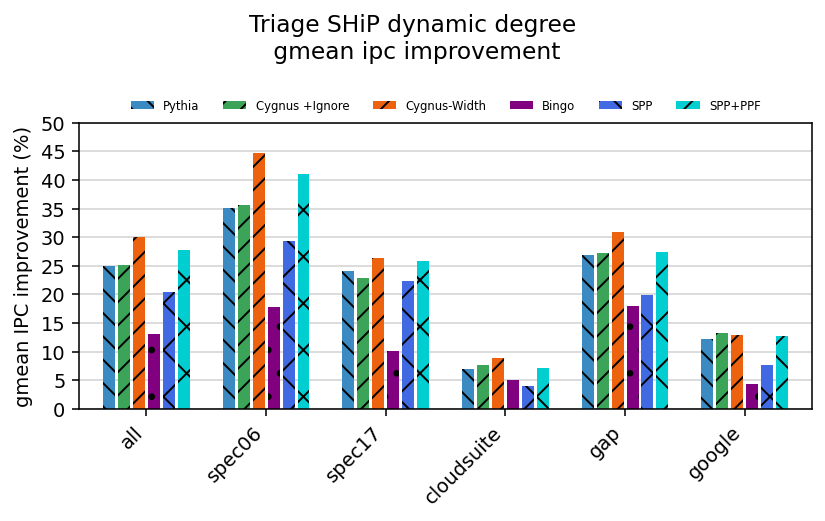

In [13]:
reload(plots)
plots.plot_metric_means(triage_degreedyn_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches,
                        legend_kwargs=triage_degreedyn_legend_kwargs,
                        label_kwargs=label_kwargs,
                        suptitle=triage_degreedyn_suptitle,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


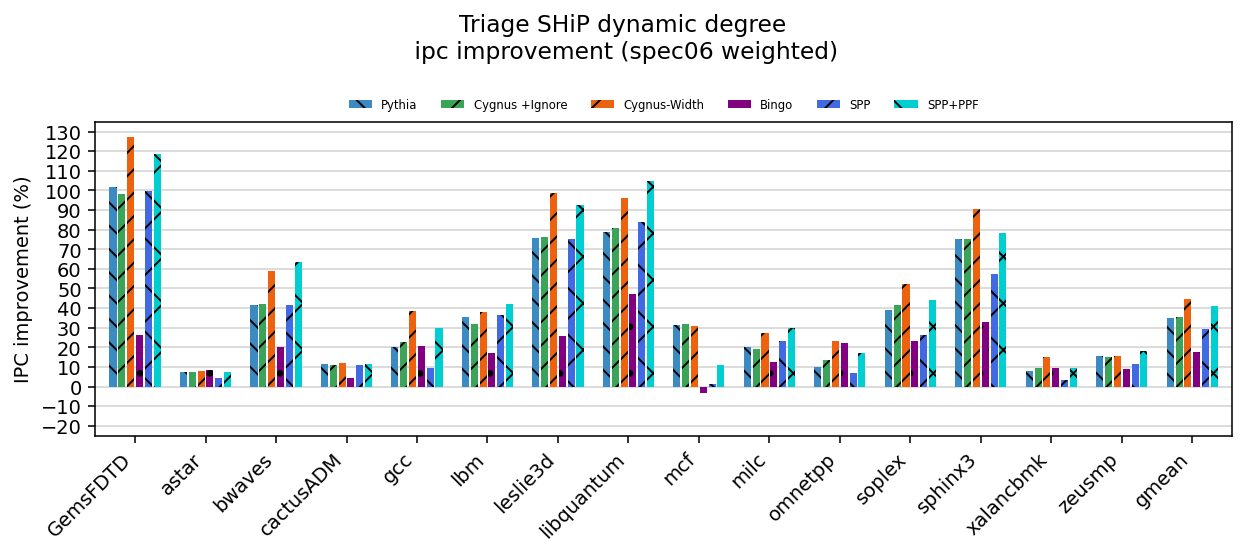

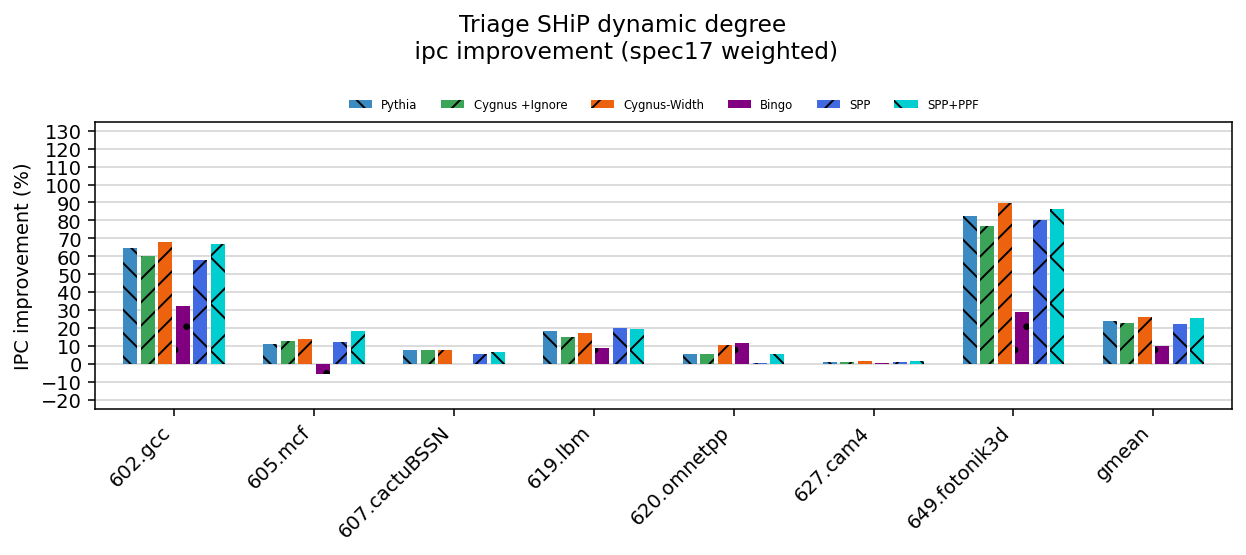

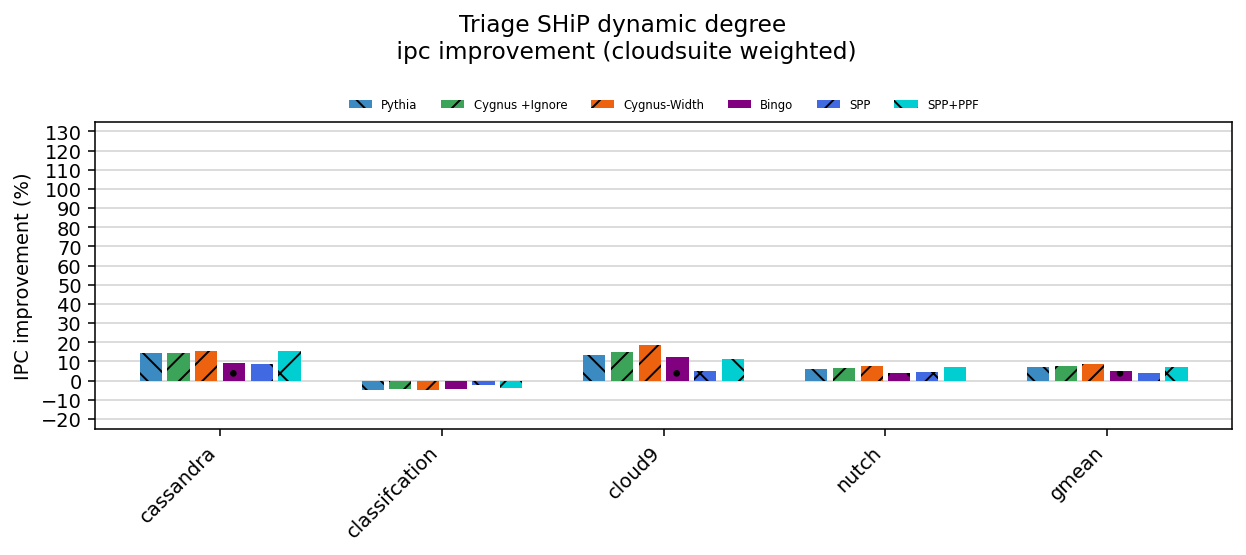

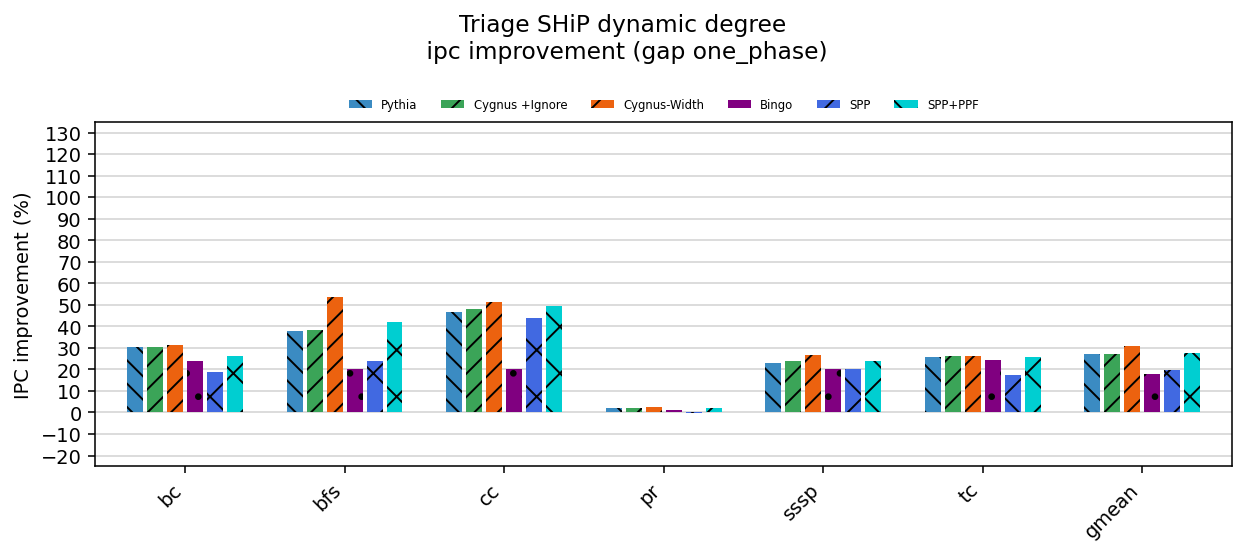

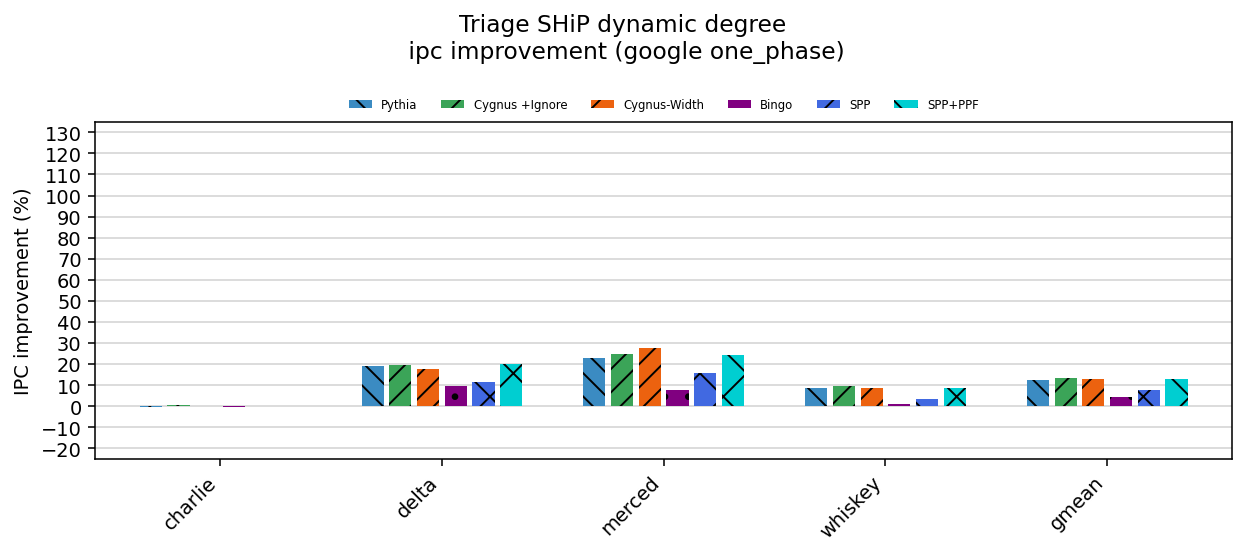

In [12]:
plots.plot_everything(triage_degreedyn_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=triage_degreedyn_legend_kwargs,
                      suptitle=triage_degreedyn_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-25, 135),
                      dpi=140, figsize=(9, 4))

### Pythia SHiP

In [8]:
pythia_ship_degreedyn_df = {
    'Pythia': dfs['pythia/degreedyn/pythia']['Delta_Path, PC_Delta'],
    'Cygnus +Ignore': dfs['pythia/degreedyn/cygnus_ignore']['Delta_Path, PC_Delta'],
    # 'Cygnus-Width': dfs['pythia/degreedyn/cygnus_width']['Delta_Path, PC_Delta'],
    
    'Bingo': dfs['pythia/degreedyn/baseline']['bingo'],
    'SPP': dfs['pythia/degreedyn/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['pythia/degreedyn/baseline']['spp_ppf_dev'],
}

pythia_ship_degreedyn_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

pythia_ship_degreedyn_suptitle = 'Pythia SHiP dynamic degree\n'

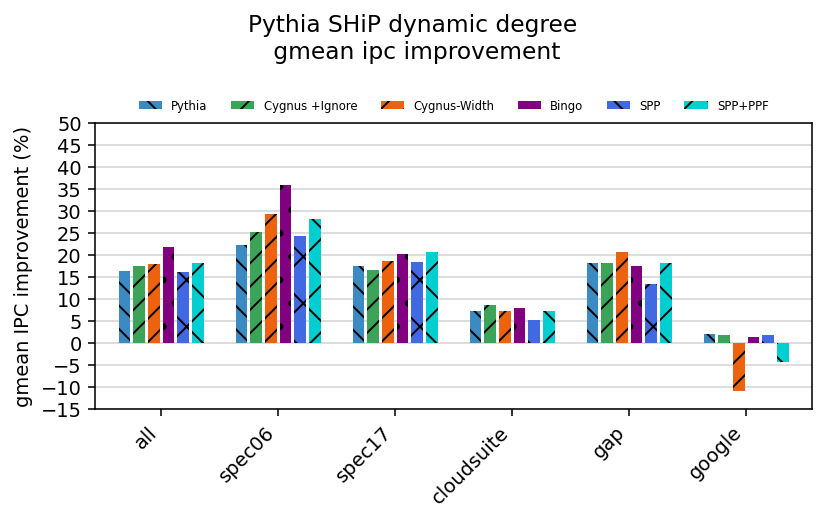

In [32]:
reload(plots)
plots.plot_metric_means(pythia_ship_degreedyn_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches,
                        legend_kwargs=pythia_ship_degreedyn_legend_kwargs,
                        label_kwargs=label_kwargs,
                        suptitle=pythia_ship_degreedyn_suptitle,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(-15, 50),
                        dpi=140, figsize=(6, 3.75))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


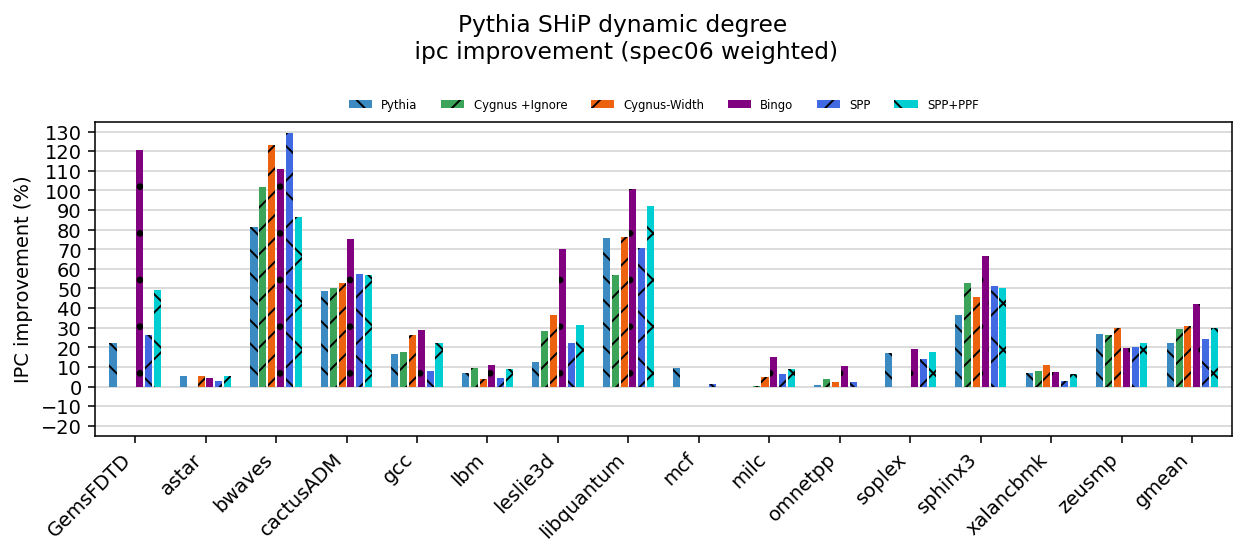

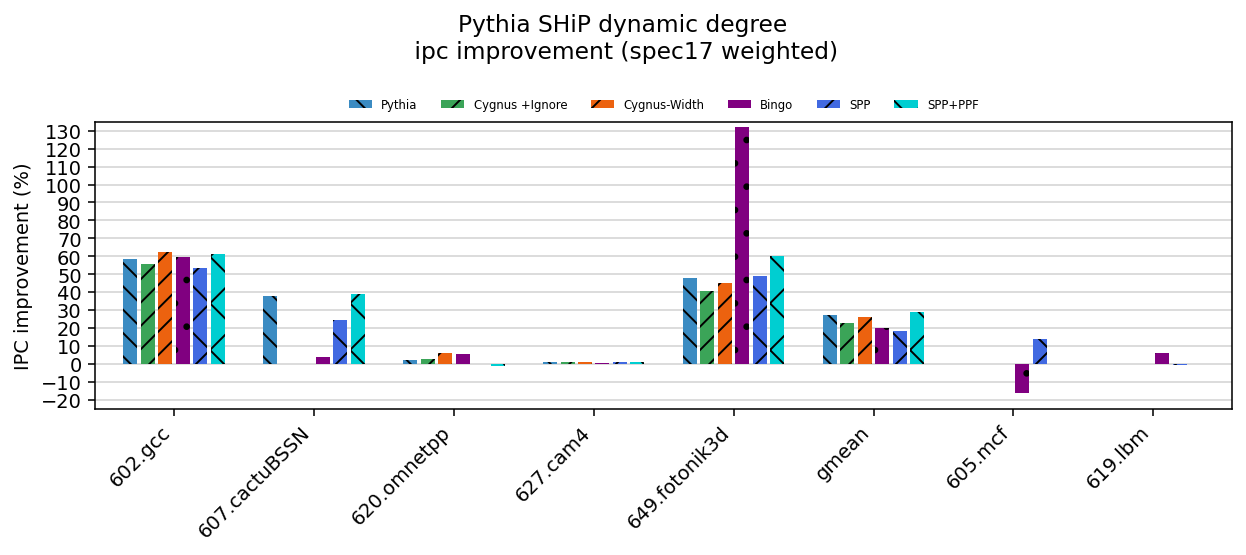

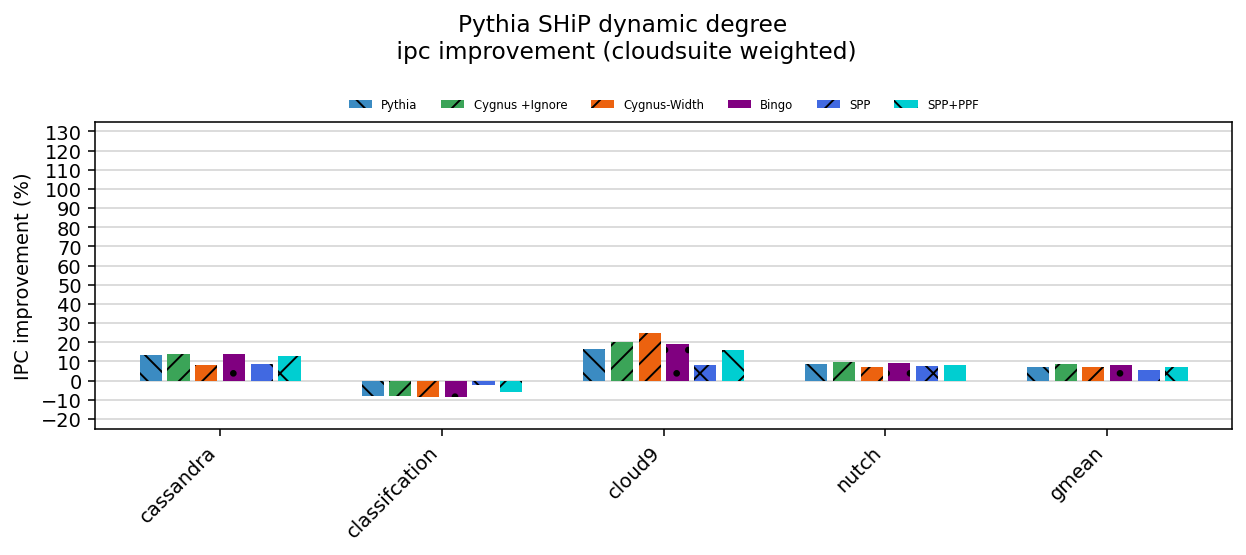

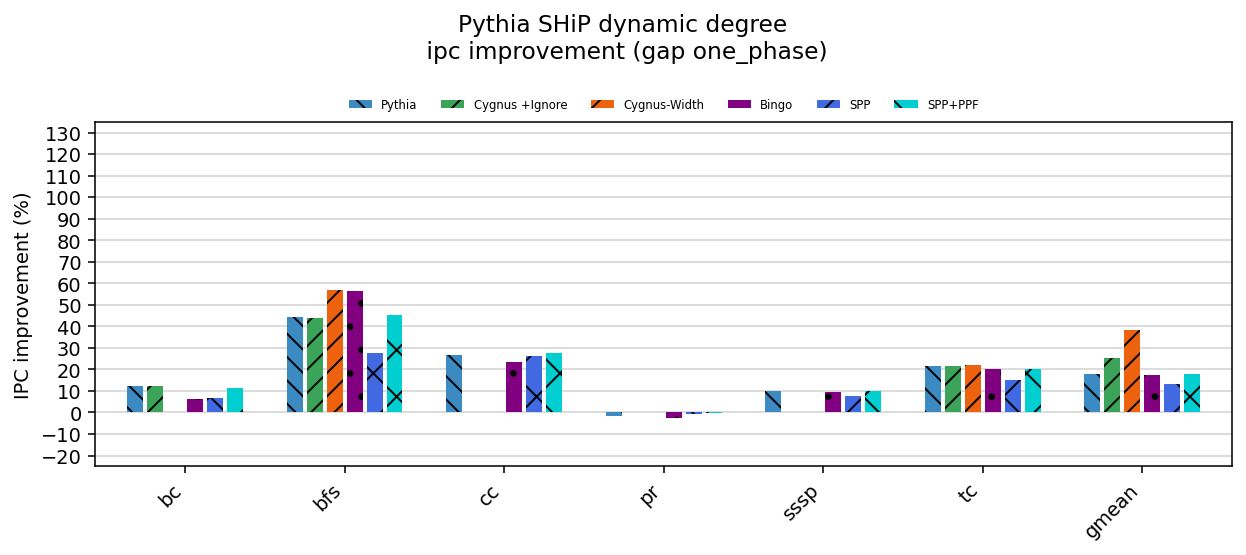

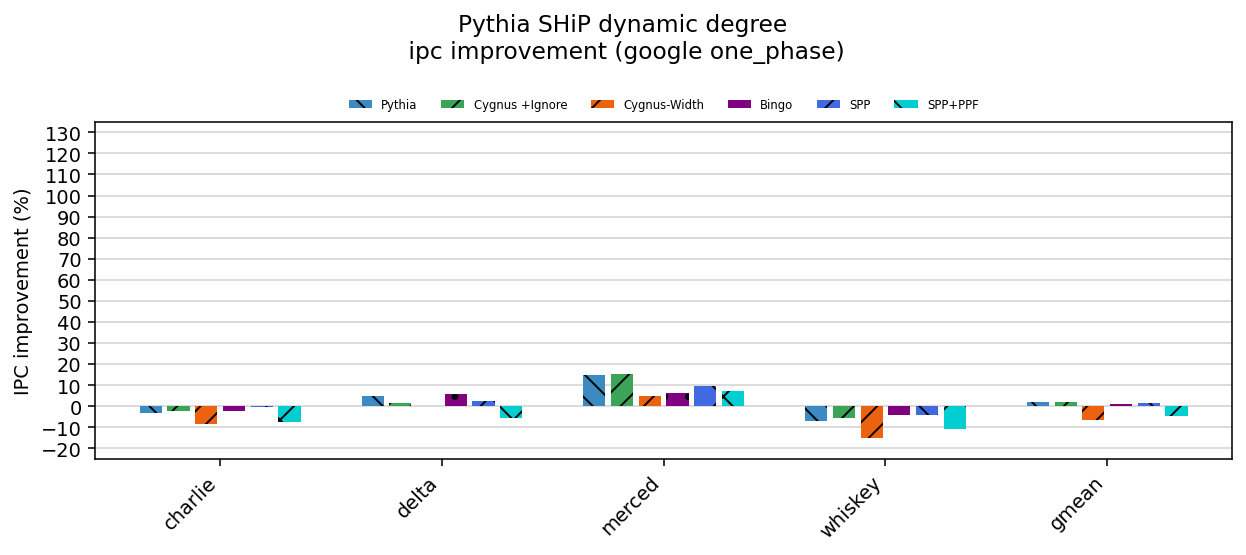

In [19]:
plots.plot_everything(pythia_ship_degreedyn_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=pythia_ship_degreedyn_legend_kwargs,
                      suptitle=pythia_ship_degreedyn_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-25, 135),
                      dpi=140, figsize=(9, 4))

### Cygnus SHiP

In [9]:
cygnus_ship_degreedyn_df = {
    'Pythia': dfs['cygnus/degreedyn/pythia']['Delta_Path, PC_Delta'],
    'Cygnus +Ignore': dfs['cygnus/degreedyn/cygnus_ignore']['Delta_Path, PC_Delta'],
    # 'Cygnus-Width': dfs['cygnus/degreedyn/cygnus_width']['Delta_Path, PC_Delta'],
    
    'Bingo': dfs['cygnus/degreedyn/baseline']['bingo'],
    'SPP': dfs['cygnus/degreedyn/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['cygnus/degreedyn/baseline']['spp_ppf_dev'],
}

cygnus_ship_degreedyn_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

cygnus_ship_degreedyn_suptitle = 'Cygnus SHiP dynamic degree\n'

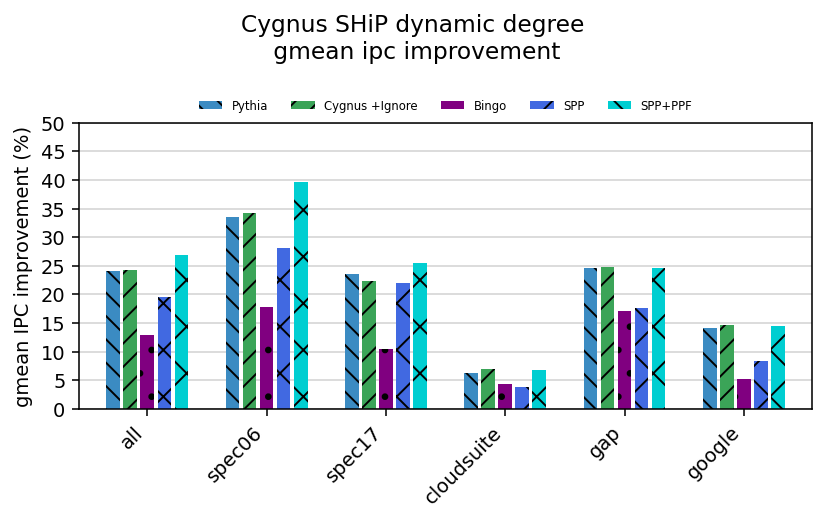

In [10]:
reload(plots)
plots.plot_metric_means(cygnus_ship_degreedyn_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches,
                        legend_kwargs=cygnus_ship_degreedyn_legend_kwargs,
                        label_kwargs=label_kwargs,
                        suptitle=cygnus_ship_degreedyn_suptitle,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


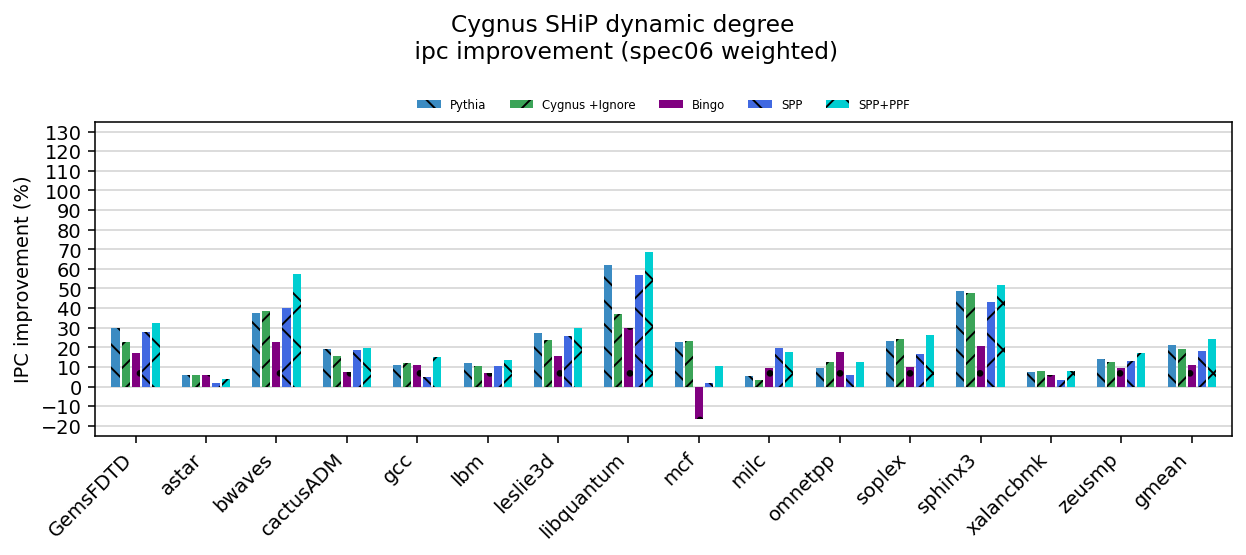

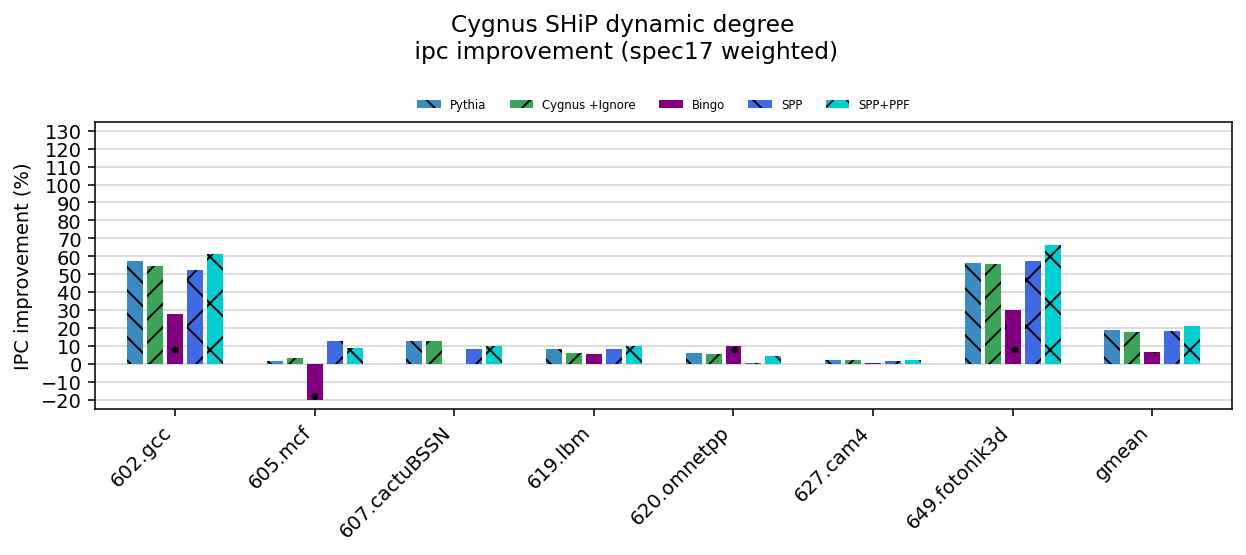

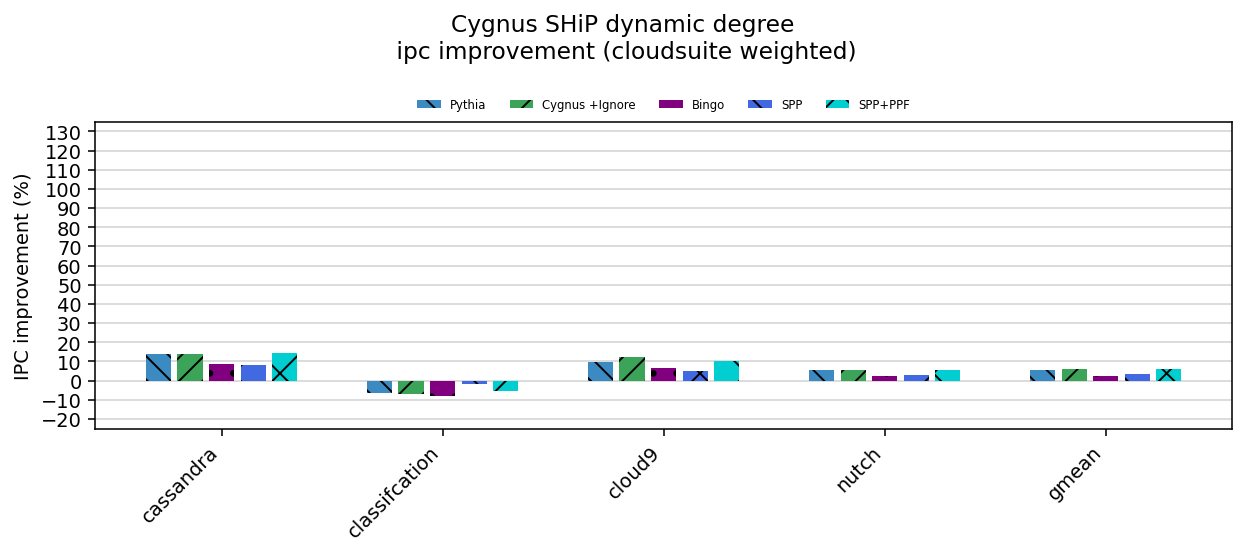

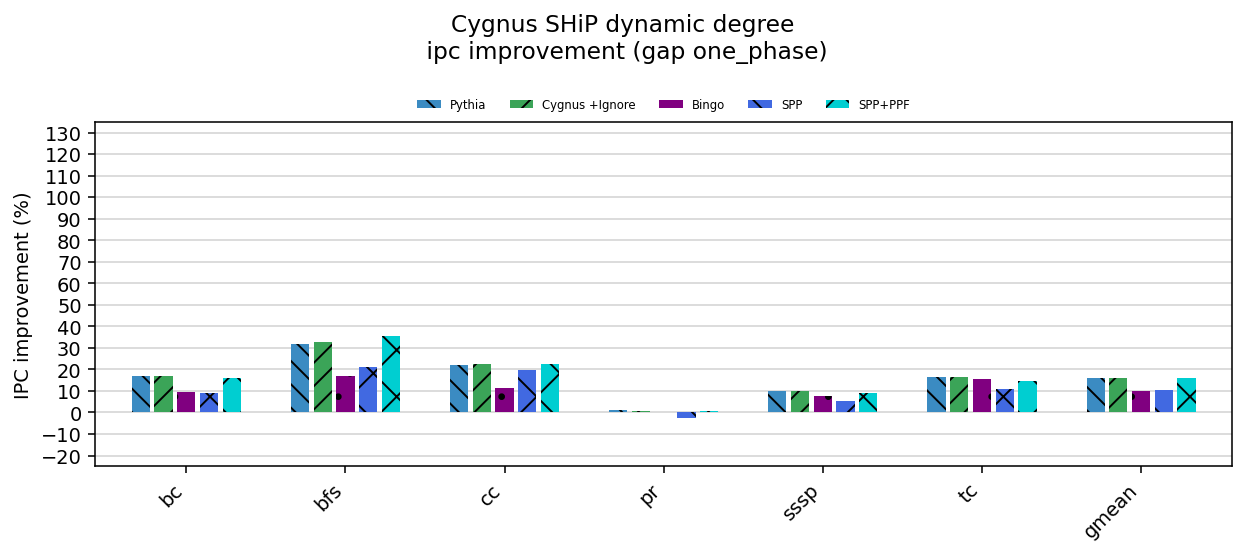

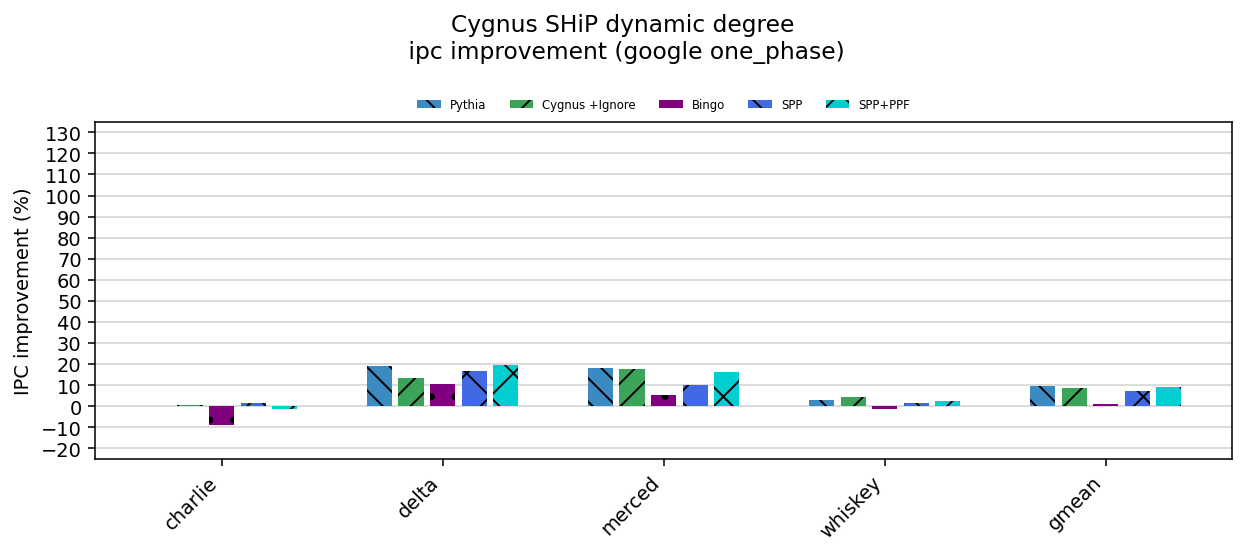

In [16]:
plots.plot_everything(cygnus_ship_degreedyn_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=cygnus_ship_degreedyn_legend_kwargs,
                      suptitle=cygnus_ship_degreedyn_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-25, 135),
                      dpi=140, figsize=(9, 4))

### Cygnus Mockingjay

In [ ]:
cygnus_mockingjay_degreedyn_df = {
    'Bingo': dfs['cygnus_mockingjay/degreedyn/baseline']['bingo'],
    'SPP': dfs['cygnus_mockingjay/degreedyn/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['cygnus_mockingjay/degreedyn/baseline']['spp_ppf_dev'],
}

cygnus_mockingjay_degreedyn_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

cygnus_mockingjay_degreedyn_suptitle = 'Cygnus Mockingjay dynamic degree\n'

In [ ]:
plots.plot_metric_means(cygnus_mockingjay_degreedyn_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                        legend_kwargs=cygnus_mockingjay_degreedyn_legend_kwargs,
                        suptitle=cygnus_mockingjay_degreedyn_suptitle, add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5, ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

In [ ]:
plots.plot_everything(cygnus_mockingjay_degreedyn_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=cygnus_mockingjay_degreedyn_legend_kwargs,
                      suptitle=cygnus_mockingjay_degreedyn_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-10, 125),
                      dpi=140, figsize=(9, 4))

### Cygnus DRRIP

In [ ]:
cygnus_drrip_degreedyn_df = {
    'Bingo': dfs['cygnus_drrip/degreedyn/baseline']['bingo'],
    'SPP': dfs['cygnus_drrip/degreedyn/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['cygnus_drrip/degreedyn/baseline']['spp_ppf_dev'],
}

cygnus_drrip_degreedyn_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

cygnus_drrip_degreedyn_suptitle = 'Cygnus DRRIP dynamic degree\n'

In [ ]:
reload(plots)
plots.plot_metric_means(cygnus_drrip_degreedyn_df, suites=suites, metric='ipc_improvement',
                        colors=colors, hatches=hatches,
                        legend_kwargs=cygnus_drrip_degreedyn_legend_kwargs,
                        label_kwargs=label_kwargs,
                        suptitle=cygnus_drrip_degreedyn_suptitle,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 50),
                        dpi=140, figsize=(6, 3.75))

In [ ]:
plots.plot_everything(cygnus_drrip_degreedyn_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=colors, hatches=hatches, label_kwargs=label_kwargs,
                      legend_kwargs=cygnus_drrip_degreedyn_legend_kwargs,
                      suptitle=cygnus_drrip_degreedyn_suptitle, add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10, ylim=(-10, 125),
                      dpi=140, figsize=(9, 4))

# Tables

## Degree 1

### Triage

In [ ]:
tables.table_everything(triage_degree1_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(triage_degree1_df, suites, 'ipc_improvement')

### Pythia SHiP

In [ ]:
tables.table_everything(pythia_ship_degree1_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(pythia_ship_degree1_df, suites, 'ipc_improvement')

### Cygnus SHiP

In [ ]:
tables.table_everything(cygnus_ship_degree1_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(cygnus_ship_degree1_df, suites, 'ipc_improvement')

### Cygnus Mockingjay

In [ ]:
tables.table_everything(cygnus_mockingjay_degree1_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(cygnus_mockingjay_degree1_df, suites, 'ipc_improvement')

### Cygnus DRRIP

In [ ]:
tables.table_everything(cygnus_drrip_degree1_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(cygnus_drrip_degree1_df, suites, 'ipc_improvement')

## Dynamic degree

### Triage

In [ ]:
tables.table_everything(triage_degreedyn_df, suites=suites, metrics=metrics)

In [15]:
tables.table_metric_all(triage_degreedyn_df, suites, 'ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Pythia,25.037182,35.177817,24.141427,6.978955,26.966043,12.255711
Cygnus +Ignore,25.237616,35.616924,22.876796,7.608549,27.323013,13.273580
Cygnus-Width,30.017775,44.738577,26.428612,8.867073,30.834357,12.953931
Bingo,13.059004,17.772725,10.165395,4.994054,18.034209,4.377804
SPP,20.372210,29.432141,22.401393,3.963129,19.892257,7.596376
SPP+PPF,27.738983,41.101552,25.876315,7.187075,27.401362,12.825320


### Pythia SHiP

In [ ]:
tables.table_everything(pythia_ship_degreedyn_df, suites=suites, metrics=metrics)

In [13]:
tables.table_metric_all(pythia_ship_degreedyn_df, suites, 'ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Pythia,16.229819,22.236789,17.506745,7.199211,18.043037,2.039951
Cygnus +Ignore,17.434624,25.303139,16.626180,8.544457,18.186929,1.859227
Cygnus-Width,17.819531,29.354158,18.509995,7.297827,20.610292,-10.834466
Bingo,21.827325,35.976139,20.276320,7.931363,17.557390,1.281169
SPP,16.037746,24.189890,18.279155,5.305198,13.298010,1.796982
SPP+PPF,18.262793,28.157386,20.625005,7.363357,18.061000,-4.377210


### Cygnus SHiP


In [ ]:
tables.table_everything(cygnus_ship_degreedyn_df, suites=suites, metrics=metrics)

In [16]:
tables.table_metric_all(cygnus_ship_degreedyn_df, suites, 'ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Pythia,16.418293,21.328955,18.771828,5.307350,16.020160,9.700239
Cygnus +Ignore,15.486116,19.231673,18.047596,5.963940,16.179785,8.814885
Cygnus +IgnoreCrossPage,15.212859,16.440146,20.356427,5.876268,19.458883,7.981991
Bingo,7.681873,11.009482,6.412289,2.378089,10.087434,1.068946
SPP,13.694179,18.299826,18.386866,3.518084,10.353246,7.314675
SPP+PPF,17.962440,24.330715,20.899573,6.011066,15.847187,8.943163


### Cygnus Mockingjay

In [ ]:
tables.table_everything(cygnus_mockingjay_degreedyn_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(cygnus_mockingjay_degreedyn_df, suites, 'ipc_improvement')

### Cygnus DRRIP

In [ ]:
tables.table_everything(cygnus_drrip_degreedyn_df, suites=suites, metrics=metrics)

In [ ]:
tables.table_metric_all(cygnus_drrip_degreedyn_df, suites, 'ipc_improvement')